In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MultivariatePoisson import MultivariatePoisson as mvp
from scipy.stats import norm, multivariate_normal
from CopulaGenerator import CopulaGenerator
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

In [3]:
a = np.random.randint(1,20,size=(12))
a

array([18,  9, 15, 11, 11,  6,  3, 11, 10,  4,  2, 13])

In [10]:
cov = np.array([[1, 0], [0, 1]])
multi_gauss = mvp(family="Gaussian", cov=cov)

In [20]:
data, mean = multi_gauss.rvs(size=(2,100))

In [21]:
print(data[1,:50])

[3. 3. 1. 5. 4. 7. 3. 5. 3. 5. 6. 5. 5. 3. 2. 6. 8. 7. 6. 6. 4. 4. 5. 3.
 2. 3. 3. 6. 5. 7. 5. 0. 5. 9. 3. 3. 2. 3. 6. 1. 4. 7. 4. 5. 5. 5. 4. 3.
 1. 3.]


In [23]:
pm = multi_gauss.pmf(data, mean)

error: failed in converting 2nd argument `upper' of mvn.mvnun to C/Fortran array

In [4]:
def draw_board(x, pmf):
    dim = x.shape[1]
    min_v = int(np.min(x))
    max_v = int(np.max(x))
    fresh_board = np.zeros((dim, dim))
    
    
    for i in range(min_v, max_v+1):
        for j in range(min_v, max_v+1):
            a = np.argwhere(x[0]==i)
            b = np.argwhere(x[1]==j)
            if np.in1d(a, b).any():
                index_pmf = [i for i in a if i in b][0]
                value_in_pmf = pmf[index_pmf]
                fresh_board[i][j] = value_in_pmf
                
    return fresh_board

In [6]:
b = np.random.randint(1,20,size=12)
b

array([17, 19, 19, 13, 18,  7,  1,  6, 12,  7, 13, 15])

In [7]:
c = np.zeros((5,5))
c

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [13]:
d = np.random.uniform(size=(1,5))
d

array([[0.41992057, 0.48531793, 0.05504541, 0.04841525, 0.51137424]])

In [15]:
np.fill_diagonal(c, d)

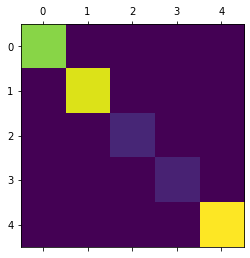

In [17]:
plt.hexbin(data[0], data[1])

In [7]:
mp = mvp(family="clayton", alpha=4.4)
data, mean = mp.rvs(size=(2,1000))

In [26]:
pmf = mp.pmf(data, mean)

In [28]:
matrix = np.zeros((15,15))
np.fill_diagonal(matrix,pmf)
plt.matshow(pmf)

ValueError: not enough values to unpack (expected 2, got 1)

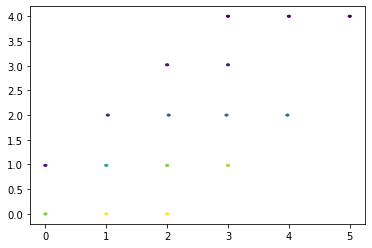

In [24]:
plt.hexbin(data[0], data[1], C=pmf)

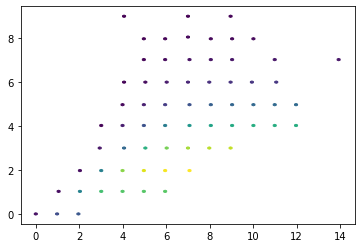

In [27]:
plt.hexbin(data[0], data[1], C=pmf)